In [2]:
import numpy as np
from sklearn.svm import SVC #分类
import matplotlib.pyplot as plt
%matplotlib inline

a = [[1,2,3]]
b = [[4,5,6]]
np.c_[a,b] #数组的串联
np.r_[a,b] #数组的并联
dot1 = np.random.randn(20,2)+[-3,-3]
print(dot1) #生成一个20X2的随机数组，前面一个数减3，后面一个数减3
dot2 = np.random.randn(20,2)+[2,3]
print(dot2) #生成一个20X2的随机数组，前面一个数加3，后面一个数减3
x_train = np.r_[dot1, dot2]
print(x_train)

[[-3.44044065 -3.62503426]
 [-4.74204427 -3.24090533]
 [-1.77037009 -2.09414469]
 [-2.74975103 -4.01260379]
 [-4.55465117 -2.54845646]
 [-5.25752216 -1.96105966]
 [-1.96226538 -2.97319838]
 [-2.84015695 -2.71634646]
 [-1.0667508  -2.03516491]
 [-4.36447413 -3.95710667]
 [-1.06385071 -3.26249151]
 [-2.87968046 -3.38405126]
 [-2.12178105 -3.19424691]
 [-3.729057   -3.75032354]
 [-4.48588179 -2.87183374]
 [-3.48931111 -1.77017239]
 [-2.35582982 -2.46449613]
 [-0.83239953 -1.82635206]
 [-1.6183961  -2.84929936]
 [-3.29788645 -2.24110859]]
[[1.02015917 3.69455905]
 [1.70775669 2.44933949]
 [1.47286289 4.65565602]
 [3.42345982 3.62914109]
 [1.9961889  3.23995431]
 [1.98051038 3.27372929]
 [2.10243545 2.70731701]
 [3.56253666 3.11645175]
 [1.88470835 2.16284111]
 [3.04541976 3.02460609]
 [2.00381217 3.05315146]
 [1.1276713  2.54462769]
 [1.96338464 2.97712751]
 [2.31481783 3.93714657]
 [2.40640355 3.82804641]
 [0.34864282 1.25221459]
 [2.82225005 4.1402379 ]
 [3.41087881 3.90097174]
 [2.53914

In [3]:
y_train = np.r_[np.zeros(20), np.ones(20)]
y_train.ravel() #降维

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

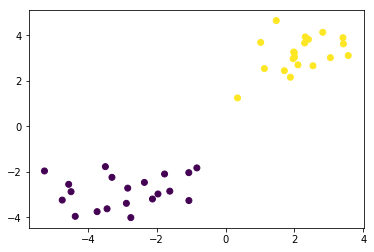

In [4]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train )

In [5]:
svc = SVC(kernel="linear")
svc.fit(x_train, y_train)
coef_ = svc.coef_
coef_

array([[0.21725445, 0.5663068 ]])

In [6]:
coef_[0,0]/coef_[0,1]

0.38363384089153707

In [7]:
intercept_ = svc.intercept_
intercept_

array([0.21511814])

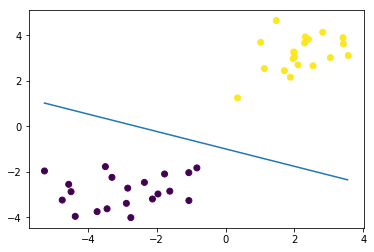

In [10]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
x = np.arange(x_train[:,0].min(),x_train[:,0].max(),0.1)
a = -coef_[0,0]/coef_[0,1] #系数
b = -svc.intercept_[0] / svc.coef_[0,0] #截距
plt.plot(x, a*x+b) #线性回归

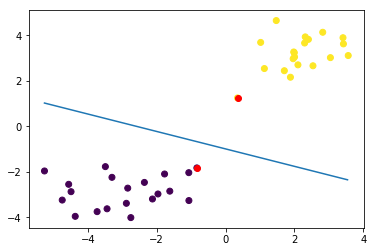

In [11]:
svc.support_vectors_ #获取支持向量，数据
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.plot(x, a*x+b) #线性回归
plt.scatter(svc.support_vectors_[:,0],
            svc.support_vectors_[:,1],
            c = "red",
            alpha = 1)

In [12]:
sv_ = svc.support_vectors_
upper_dot = sv_[0]
upper_b = upper_dot[1] - a*upper_dot[0] #根据ax+b，计算上界
down_dot = sv_[-1]
down_b = down_dot[1] - a*down_dot[0] #根据ax+b，计算下界

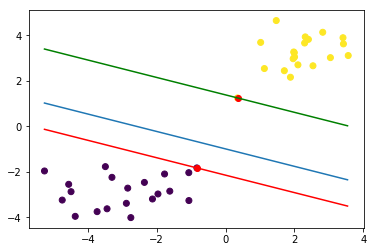

In [13]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.plot(x, a*x+b) #线性回归
plt.scatter(svc.support_vectors_[:,0],
            svc.support_vectors_[:,1],
            c = "red",
            alpha = 1)
plt.plot(x, a*x+upper_b, c="r")
plt.plot(x, a*x+down_b, c="g")